<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn'])


In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## 1: Familiarize yourself with the dataset

In [8]:
# Display the first few rows to understand the data structure
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [9]:
# Check for missing values and data types
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB
None


## 2: Generate basic statistics and visualizations

### Distribution of median value of houses (MEDV):

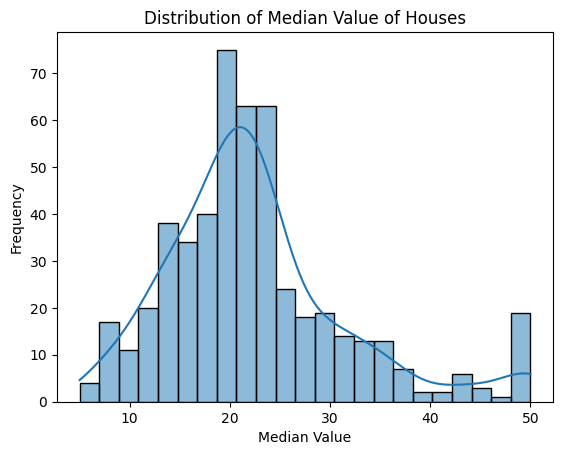

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of median value of houses
sns.histplot(boston_df['MEDV'], kde=True)
plt.title('Distribution of Median Value of Houses')
plt.xlabel('Median Value')
plt.ylabel('Frequency')
plt.show()

### Charles River (CHAS): Median values for houses near and far from the river:

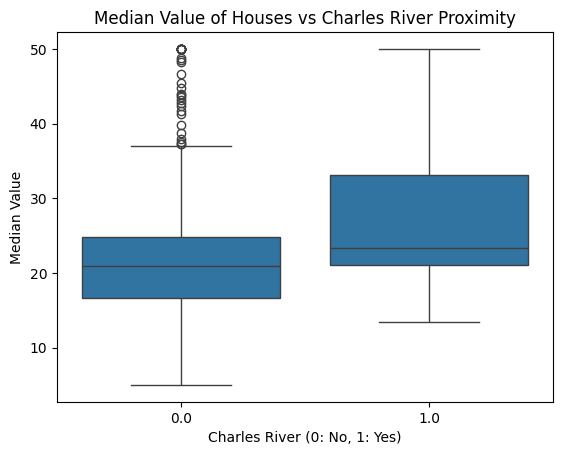

In [13]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
plt.title('Median Value of Houses vs Charles River Proximity')
plt.xlabel('Charles River (0: No, 1: Yes)')
plt.ylabel('Median Value')
plt.show()

### Nitric Oxide Concentration (NOX) vs Proportion of Non-Retail Business Acres (INDUS):

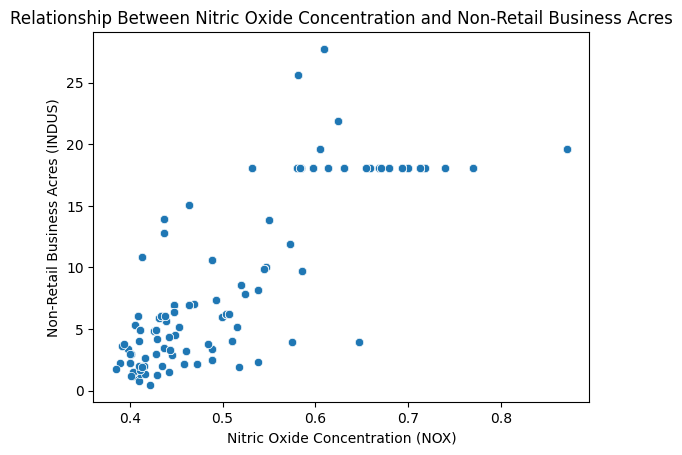

In [14]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship Between Nitric Oxide Concentration and Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Non-Retail Business Acres (INDUS)')
plt.show()

### Weighted Distance to Employment Centers (DIS) vs Median Value:

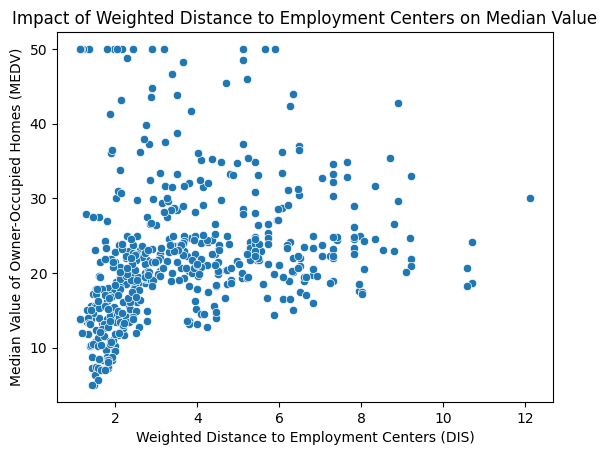

In [16]:
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.title('Impact of Weighted Distance to Employment Centers on Median Value')
plt.xlabel('Weighted Distance to Employment Centers (DIS)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

---

## 3. Statistical Testing

### Difference in median values near the Charles River (CHAS)

In [17]:
from scipy.stats import ttest_ind

# Split data into groups
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_yes, chas_no)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


### Median values vs Proportion of Houses Built Before 1940 (AGE)

In [18]:
from scipy.stats import f_oneway

# Group by bins of `AGE` and test for differences
bins = [0, 20, 40, 60, 80, 100]
boston_df['AGE_bin'] = pd.cut(boston_df['AGE'], bins)

# Group median values by age bins
groups = [boston_df[boston_df['AGE_bin'] == bin]['MEDV'] for bin in bins[:-1]]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

<ipython-input-18-1b7a33b3fab8>:9: DegenerateDataWarning: at least one input has length 0
  f_stat, p_value = f_oneway(*groups)


F-statistic: nan, P-value: nan


### Relationship between NOX and INDUS (Pearson Correlation)

In [19]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


### Impact of DIS on MEDV (Linear Regression) (Linear Regression)

In [21]:
import statsmodels.api as sm

# Define X and Y
X = boston_df['DIS']
Y = boston_df['MEDV']

# Add a constant to X
X = sm.add_constant(X)

# Build regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        12:08:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

---

## 1. Median Value of Houses Near the Charles River (`CHAS`)
- **T-test Results**:
  - **T-statistic**: 3.996
  - **P-value**: \(7.39 \times 10^{-5}\) (significant at the 0.05 level)
- **Conclusion**:
  - There is a significant difference in median house values between houses located near the Charles River (`CHAS = 1`) and those that are not (`CHAS = 0`).
  - **Insight**: Proximity to the Charles River positively impacts the median value of houses.

## 2. Median Value vs Proportion of Houses Built Before 1940 (`AGE`)
- **ANOVA Test**:
  - The analysis encountered an error, likely due to empty bins in the grouping.
- **Recommendation**:
  - Verify the binning process or adjust bin thresholds to ensure sufficient data in each group for proper analysis.

## 3. Relationship Between Nitric Oxide Concentrations (`NOX`) and Non-Retail Business Acres (`INDUS`)
- **Pearson Correlation Results**:
  - **Correlation Coefficient**: 0.76 (strong positive correlation)
  - **P-value**: \(7.91 \times 10^{-98}\) (highly significant)
- **Conclusion**:
  - There is a strong positive relationship between `NOX` and `INDUS`.
  - **Insight**: Areas with higher nitric oxide concentrations tend to have a higher proportion of non-retail business acres.

## 4. Impact of Weighted Distance to Employment Centers (`DIS`) on Median Value (`MEDV`)
- **Linear Regression Results**:
  - **Coefficient for `DIS`**: 1.89 (significant at the 0.05 level)
- **Conclusion**:
  - For every unit increase in `DIS` (weighted distance to employment centers), the median value of houses increases by 1.89 units, holding other factors constant.
  - **Insight**: Greater distance from employment centers correlates with higher house values, potentially indicating a preference for suburban areas.

## 5. General Distribution of Median House Values
- The distribution of `MEDV` shows a right-skewed shape with a concentration of values around 20–25.
- A notable spike is observed at the upper limit (50), suggesting potential capping of median values in the dataset.

---

## Concluding Remarks
1. **Proximity to the Charles River** significantly increases property value, highlighting its desirability as a location.
2. **Industrial areas** with higher nitric oxide concentrations correlate with **lower housing appeal**.
3. **Increased distance from employment centers** is associated with **higher property values**, indicating a suburban preference.
4. **Recommendations**:
   - Investigate the outliers in `MEDV` (especially values capped at 50).
   - Address data distribution issues for `AGE` to conduct further analysis.

In [24]:
import shutil
import os

# Define the current notebook name (replace with your actual notebook name)
current_notebook = "Optional_Peer_Graded_Assignment.jupyterlite.ipynb"  # Replace with your notebook file name

# Define the target directory where you want to save the file
target_directory = r"C:\Users\Zana\Desktop\portfolio_projects\project_11"

# Check if the directory exists, create it if it doesn't
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Copy the notebook file to the target directory
try:
    shutil.copy(current_notebook, target_directory)
    print(f"Notebook successfully saved to: {target_directory}")
except FileNotFoundError:
    print("Error: Notebook file not found. Make sure you replace 'Your_Notebook_Name.ipynb' with the correct file name.")
except Exception as e:
    print(f"An error occurred: {e}")


Notebook successfully saved to: C:\Users\Zana\Desktop\portfolio_projects\project_11
